# Clustering (Global Development)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [3]:
#Load the Dataset
data = pd.read_excel("World_development_mesurement.xlsx")
data.head()

,Birth Rate,Business Tax Rate,CO2 Emissions,Country,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,...,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,0.020,NaN,87931.0,Algeria,NaN,NaN,26998.0,"$54,790,058,957",0.035,$60,...,67.0,0.0,1,0.342,0.619,0.039,31719449,0.599,"$102,000,000","$193,000,000"
1,0.050,NaN,9542.0,Angola,NaN,NaN,7499.0,"$9,129,594,819",0.034,$22,...,44.0,0.0,1,0.476,0.499,0.025,13924930,0.324,"$34,000,000","$146,000,000"
2,0.043,NaN,1617.0,Benin,NaN,NaN,1983.0,"$2,359,122,303",0.043,$15,...,53.0,0.0,1,0.454,0.517,0.029,6949366,0.383,"$77,000,000","$50,000,000"
3,0.027,NaN,4276.0,Botswana,NaN,NaN,1836.0,"$5,788,311,645",0.047,$152,...,49.0,0.1,1,0.383,0.587,0.029,1755375,0.532,"$227,000,000","$209,000,000"
4,0.046,NaN,1041.0,Burkina Faso,NaN,NaN,NaN,"$2,610,959,139",0.051,$12,...,49.0,0.0,1,0.468,0.505,0.028,11607944,0.178,"$23,000,000","$30,000,000"


In [4]:
df = data.copy()

In [5]:
df.dtypes

Birth Rate                float64
Business Tax Rate          object
CO2 Emissions             float64
Country                    object
Days to Start Business    float64
Ease of Business          float64
Energy Usage              float64
GDP                        object
Health Exp % GDP          float64
Health Exp/Capita          object
Hours to do Tax           float64
Infant Mortality Rate     float64
Internet Usage            float64
Lending Interest          float64
Life Expectancy Female    float64
Life Expectancy Male      float64
Mobile Phone Usage        float64
Number of Records           int64
Population 0-14           float64
Population 15-64          float64
Population 65+            float64
Population Total            int64
Population Urban          float64
Tourism Inbound            object
Tourism Outbound           object
dtype: object

In [6]:
#Converting the object to float
monetary_columns = ['GDP', 'Health Exp/Capita', 'Tourism Inbound', 'Tourism Outbound']

# Remove non-numeric characters ('$', ',') and convert to numeric
for col in monetary_columns:
    df[col] = df[col].replace('[\$,]', '', regex=True).astype(float)

# Check if the conversion was successful
df[monetary_columns].head()

,GDP,Health Exp/Capita,Tourism Inbound,Tourism Outbound
0,5.479006e+10,60.0,102000000.0,193000000.0
1,9.129595e+09,22.0,34000000.0,146000000.0
2,2.359122e+09,15.0,77000000.0,50000000.0
3,5.788312e+09,152.0,227000000.0,209000000.0
4,2.610959e+09,12.0,23000000.0,30000000.0


In [7]:
df['Business Tax Rate']=df['Business Tax Rate'].astype(str).str.replace('%','',regex=True)
df['Business Tax Rate'] = pd.to_numeric(df['Business Tax Rate'], errors='coerce')

In [8]:
# This step creates a summary of data where each row represents the average metrics for a specific country
grouped_df = df.groupby('Country', as_index=False).mean()

# Drop rows with missing values (NaN) to ensure clean and reliable data for further analysis
grouped_df = grouped_df.dropna()

# Display the resulting grouped and cleaned DataFrame
grouped_df

,Country,Birth Rate,Business Tax Rate,CO2 Emissions,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,...,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
1,Albania,0.014692,42.5500,3902.090909,23.00,82.0,2024.583333,8.895522e+09,0.061462,168.846154,...,73.000000,0.561538,1.0,0.258385,0.653692,0.087923,2.956845e+06,0.478538,1.165231e+09,1.007077e+09
2,Algeria,0.022077,73.7125,102837.636364,25.00,151.0,34042.166667,1.190391e+11,0.038462,133.846154,...,68.384615,0.492308,1.0,0.292692,0.663077,0.044231,3.476067e+07,0.645154,2.752308e+08,4.513077e+08
5,Angola,0.048308,52.1000,19202.090909,92.90,178.0,10295.750000,5.049648e+10,0.041692,104.538462,...,47.384615,0.230769,1.0,0.477538,0.498154,0.024462,1.721272e+07,0.369846,2.793846e+08,2.323846e+08
6,Antigua and Barbuda,0.018385,44.4375,418.090909,22.25,66.0,140.250000,1.043837e+09,0.046308,576.076923,...,72.153846,1.115385,1.0,0.276769,0.651308,0.071846,8.352338e+04,0.286308,3.080833e+08,4.333333e+07
7,Argentina,0.017615,107.6250,159280.545455,31.80,121.0,68870.166667,3.352997e+11,0.084923,587.615385,...,71.230769,0.815385,1.0,0.260615,0.635769,0.103231,3.899545e+07,0.902385,3.987692e+09,5.057308e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,Vanuatu,0.029154,8.4000,83.000000,43.80,78.0,31.500000,4.863088e+08,0.037000,82.230769,...,67.692308,0.238462,1.0,0.394385,0.570077,0.035538,2.151523e+05,0.234154,1.472308e+08,2.069231e+07
202,"Venezuela, RB",0.021846,55.7750,180155.727273,141.30,180.0,63268.583333,2.173050e+11,0.054769,415.461538,...,70.615385,0.653846,1.0,0.310538,0.637692,0.051615,2.718807e+07,0.885692,7.503077e+08,2.073538e+09
203,Vietnam,0.016769,38.3375,98764.272727,43.20,98.0,43263.750000,7.791354e+10,0.060769,51.692308,...,70.076923,0.546154,1.0,0.266154,0.668538,0.065385,8.325515e+07,0.279462,3.597000e+09,1.325750e+09
205,"Yemen, Rep.",0.034923,62.4750,19319.090909,41.30,129.0,6517.833333,2.065261e+10,0.048308,49.000000,...,60.384615,0.215385,1.0,0.448077,0.524769,0.027231,2.066415e+07,0.295154,4.613077e+08,2.036667e+08


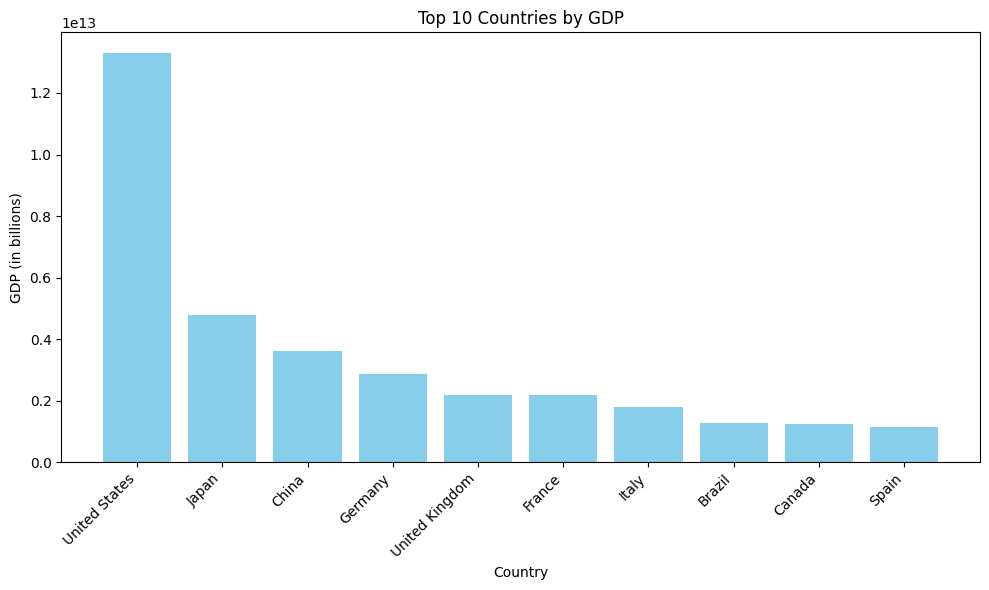

In [9]:
# Get the top 10 countries with the highest GDP
top_10_countries = grouped_df.sort_values('GDP', ascending=False).head(10)

# Plot a bar chart for the top 10 countries by GDP
plt.figure(figsize=(10, 6))
plt.bar(top_10_countries['Country'], top_10_countries['GDP'], color='skyblue')

# Add labels and title to the chart
plt.xlabel('Country')
plt.ylabel('GDP (in billions)')
plt.title('Top 10 Countries by GDP')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout and display the chart
plt.tight_layout()
plt.show()

- United States have a highest average GDP among other countries

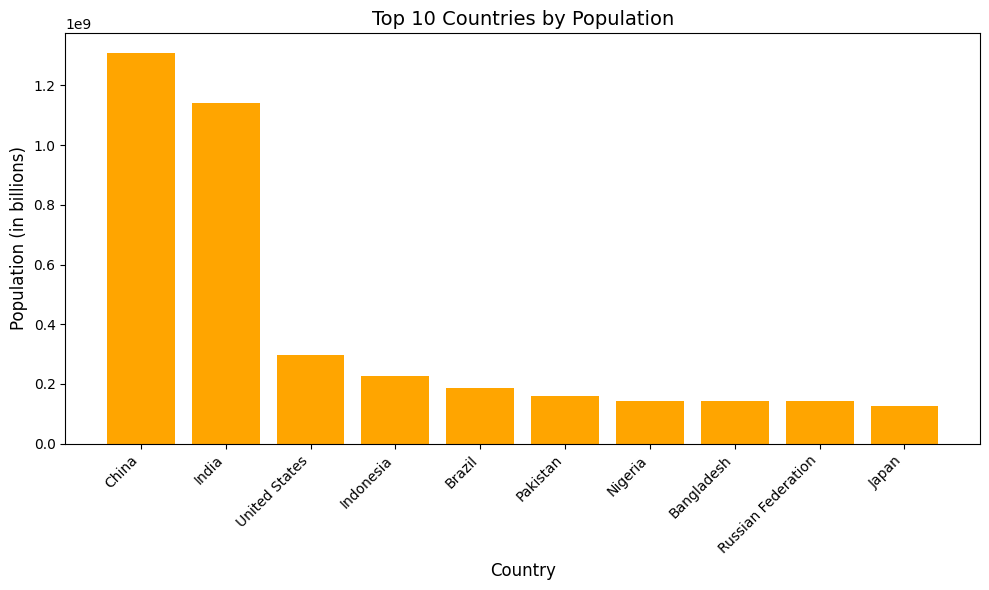

In [11]:
# Sort by Population Total and get the top 10 countries
top_10_population = grouped_df.sort_values('Population Total', ascending=False).head(10)

# Plot the top 10 countries by population as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_10_population['Country'], top_10_population['Population Total'], color='orange')

# Add labels and title
plt.xlabel('Country', fontsize=12)
plt.ylabel('Population (in billions)', fontsize=12)
plt.title('Top 10 Countries by Population', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


- China and India is highest Populated country

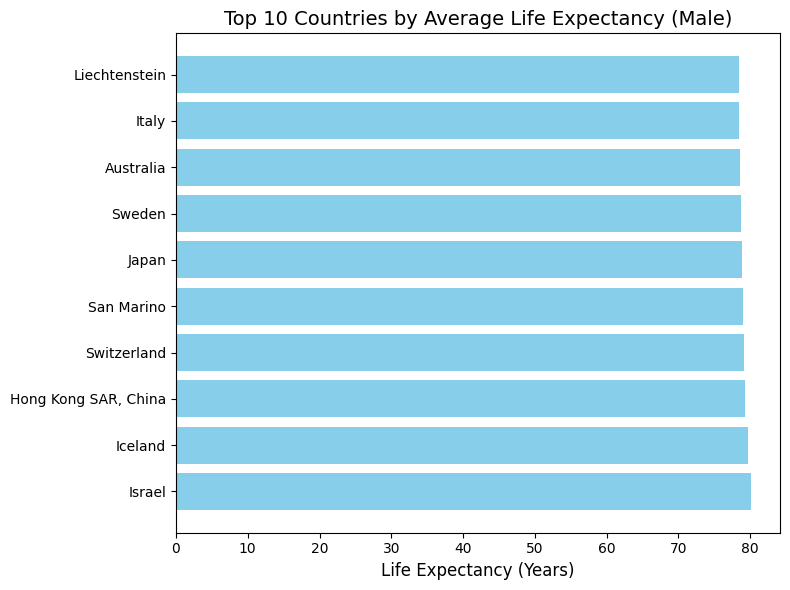

In [13]:
# Calculate the average life expectancy for males by country
avg_life_expectancy = df.groupby('Country', as_index=False)['Life Expectancy Male'].mean().dropna()

# Sort the countries by average life expectancy in descending order and select the top 10
top_10_life_expectancy = avg_life_expectancy.sort_values(by='Life Expectancy Male', ascending=False).head(10)

# Plot the top 10 countries as a horizontal bar chart
plt.figure(figsize=(8, 6))
plt.barh(top_10_life_expectancy['Country'], top_10_life_expectancy['Life Expectancy Male'], color='skyblue')

# Add title and label for the x-axis
plt.title('Top 10 Countries by Average Life Expectancy (Male)', fontsize=14)
plt.xlabel('Life Expectancy (Years)', fontsize=12)

# Adjust layout and display the chart
plt.tight_layout()
plt.show()

In [14]:
# Group the dataset by 'Country' and calculate the mean for 'Tourism Inbound' and 'Tourism Outbound'
tourism_data = df.groupby('Country', as_index=False)[['Tourism Inbound', 'Tourism Outbound']].mean().dropna()

# Sort the data by inbound tourism for better visualization
tourism_data = tourism_data.sort_values(by='Tourism Inbound', ascending=False)

# Select the top 10 countries with the highest inbound tourism for comparison
top_10_tourism = tourism_data.head(10)

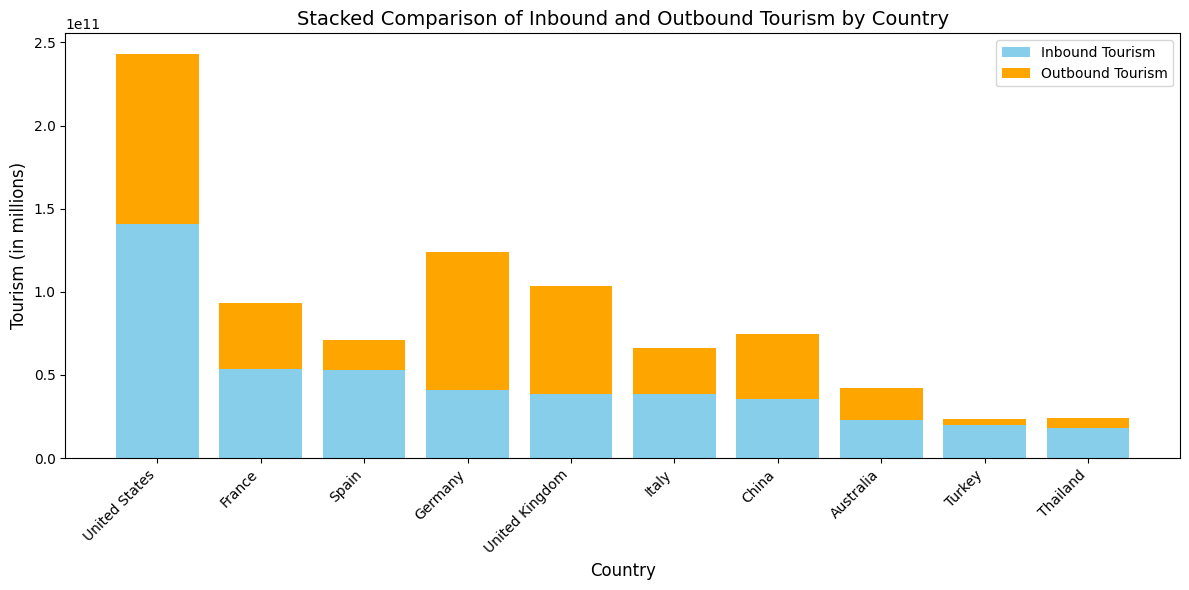

In [15]:
# Plot a stacked bar chart
plt.figure(figsize=(12, 6))
plt.bar(top_10_tourism['Country'], top_10_tourism['Tourism Inbound'], label='Inbound Tourism', color='skyblue')
plt.bar(top_10_tourism['Country'], top_10_tourism['Tourism Outbound'],
        bottom=top_10_tourism['Tourism Inbound'], label='Outbound Tourism', color='orange')

# Add labels, title, and legend
plt.xlabel('Country', fontsize=12)
plt.ylabel('Tourism (in millions)', fontsize=12)
plt.title('Stacked Comparison of Inbound and Outbound Tourism by Country', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


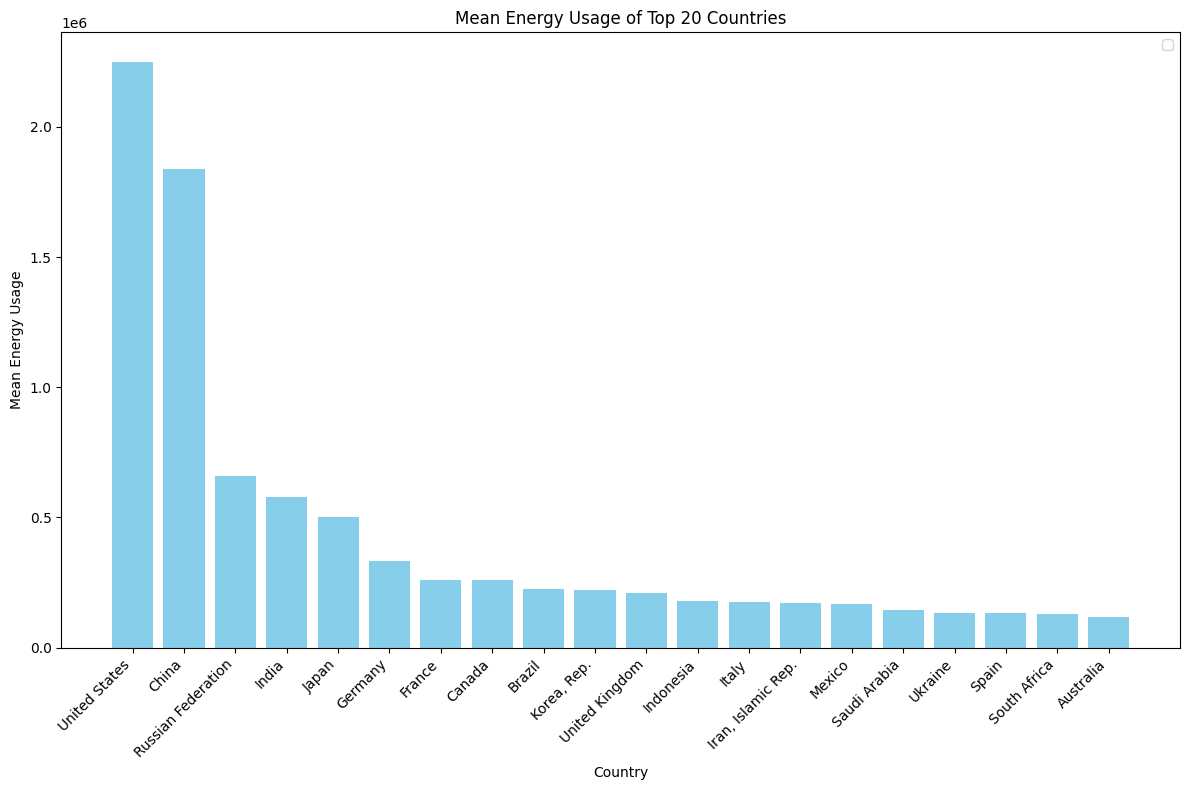

In [16]:
# Group by 'Country' and calculate the mean of 'Energy Usage'
df_mean = df.groupby('Country', as_index=False)['Energy Usage'].mean().dropna()

# Sort the data by mean energy usage and select the top 20 countries
df_top20_mean = df_mean.sort_values(by='Energy Usage', ascending=False).head(20)

# Plot the bar chart for the top 20 countries
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.bar(df_top20_mean['Country'], df_top20_mean['Energy Usage'], color='skyblue')

# Customize the plot
plt.title("Mean Energy Usage of Top 20 Countries")
plt.xlabel("Country")
plt.ylabel("Mean Energy Usage")
plt.xticks(rotation=45, ha='right')# Rotate x-axis labels for better visibility
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

- From the bar chart visualizing the mean energy usage across countries, the United States and China stand out as the highest energy consumers. These countries have consistently higher mean energy usage compared to others, reflecting their large populations, advanced industrial activities, and significant energy demands across various sectors.

In [18]:
 #label Encoding for the Country column(Categorical )
from sklearn.preprocessing import LabelEncoder

encoded = LabelEncoder()
df['Country_encoded'] = encoded.fit_transform(df['Country'])

In [19]:
# Dropping the 'Country' column as it is no longer needed for the analysis
df.drop(columns='Country',inplace=True)


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              2585 non-null   float64
 1   Business Tax Rate       1423 non-null   float64
 2   CO2 Emissions           2125 non-null   float64
 3   Days to Start Business  1718 non-null   float64
 4   Ease of Business        185 non-null    float64
 5   Energy Usage            1785 non-null   float64
 6   GDP                     2494 non-null   float64
 7   Health Exp % GDP        2395 non-null   float64
 8   Health Exp/Capita       2395 non-null   float64
 9   Hours to do Tax         1416 non-null   float64
 10  Infant Mortality Rate   2444 non-null   float64
 11  Internet Usage          2531 non-null   float64
 12  Lending Interest        1880 non-null   float64
 13  Life Expectancy Female  2568 non-null   float64
 14  Life Expectancy Male    2568 non-null   

In [21]:
# Get summary statistics for all numerical columns in the dataset
df.describe()

,Birth Rate,Business Tax Rate,CO2 Emissions,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,...,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound,Country_encoded
count,2585.000000,1423.000000,2.125000e+03,1718.000000,185.000000,1.785000e+03,2.494000e+03,2395.000000,2395.000000,1416.000000,...,2537.000000,2704.0,2484.000000,2484.000000,2484.000000,2.704000e+03,2678.000000,2.336000e+03,2.233000e+03,2704.00000
mean,0.022715,48.966901,1.423071e+05,39.999418,94.875676,7.723684e+04,2.638540e+11,0.064170,801.397077,302.068503,...,0.578124,1.0,0.303051,0.623481,0.073465,3.145729e+07,0.562953,4.939320e+09,4.729435e+09,103.50000
std,0.011338,40.954116,6.159288e+05,57.318588,54.791906,2.599239e+05,1.129910e+12,0.026325,1473.448036,273.299686,...,0.474647,0.0,0.106577,0.069660,0.049541,1.242894e+08,0.245897,1.385098e+10,1.326774e+10,60.05484
min,0.007000,8.200000,7.000000e+00,1.000000,1.000000,8.000000e+00,6.310127e+07,0.008000,2.000000,12.000000,...,0.000000,1.0,0.118000,0.474000,0.003000,1.887600e+04,0.082000,7.000000e+05,2.000000e+05,0.00000
25%,0.013000,32.400000,1.360000e+03,13.000000,48.000000,3.737000e+03,3.539042e+09,0.046000,50.000000,156.000000,...,0.100000,1.0,0.204750,0.559000,0.033000,8.783360e+05,0.356000,1.250000e+08,1.100000e+08,51.75000
50%,0.020000,41.000000,8.529000e+03,26.000000,94.000000,1.433800e+04,1.507975e+10,0.061000,193.000000,239.000000,...,0.500000,1.0,0.299500,0.642500,0.052000,5.800324e+06,0.560000,6.885000e+08,4.560000e+08,103.50000
75%,0.031000,51.550000,5.910800e+04,45.000000,142.000000,4.185200e+04,1.102047e+11,0.079000,665.000000,344.750000,...,0.900000,1.0,0.402000,0.676000,0.112000,2.014089e+07,0.765000,3.601500e+09,2.842000e+09,155.25000
max,0.053000,339.100000,8.286892e+06,694.000000,189.000000,2.727728e+06,1.624460e+13,0.225000,9908.000000,2600.000000,...,2.900000,1.0,0.500000,0.858000,0.244000,1.350695e+09,1.000000,2.000920e+11,1.265730e+11,207.00000


- "Number of Records" have 0 standard deviation which means same values is present in each record.

In [23]:
df.drop(columns=['Number of Records','Business Tax Rate','Ease of Business','Hours to do Tax'],inplace=True)

### Handling Missing Values

- 'Business Tax Rate', 'Ease of Business', 'Health Exp GDP', 'Hours to do Tax' and 'Population 0to14' columns has normal distribution so we replace missing values by mean.
- And for remaining columns with skewed data we replace missing values by median.

In [26]:
df.isnull().sum()

Birth Rate                119
CO2 Emissions             579
Days to Start Business    986
Energy Usage              919
GDP                       210
Health Exp % GDP          309
Health Exp/Capita         309
Infant Mortality Rate     260
Internet Usage            173
Lending Interest          824
Life Expectancy Female    136
Life Expectancy Male      136
Mobile Phone Usage        167
Population 0-14           220
Population 15-64          220
Population 65+            220
Population Total            0
Population Urban           26
Tourism Inbound           368
Tourism Outbound          471
Country_encoded             0
dtype: int64

## Observations
1. Ease of Business has more number of null values or missing values.
2. 'Population Urban' contains less number of missing values
3. There are no missing values in 'Country' and 'Population Total'

- There are 26 null values in population urban column which is less than 1% values so droping those rows

In [29]:
df.dropna(subset=['Population Urban'],inplace=True)

## Distribution Plot

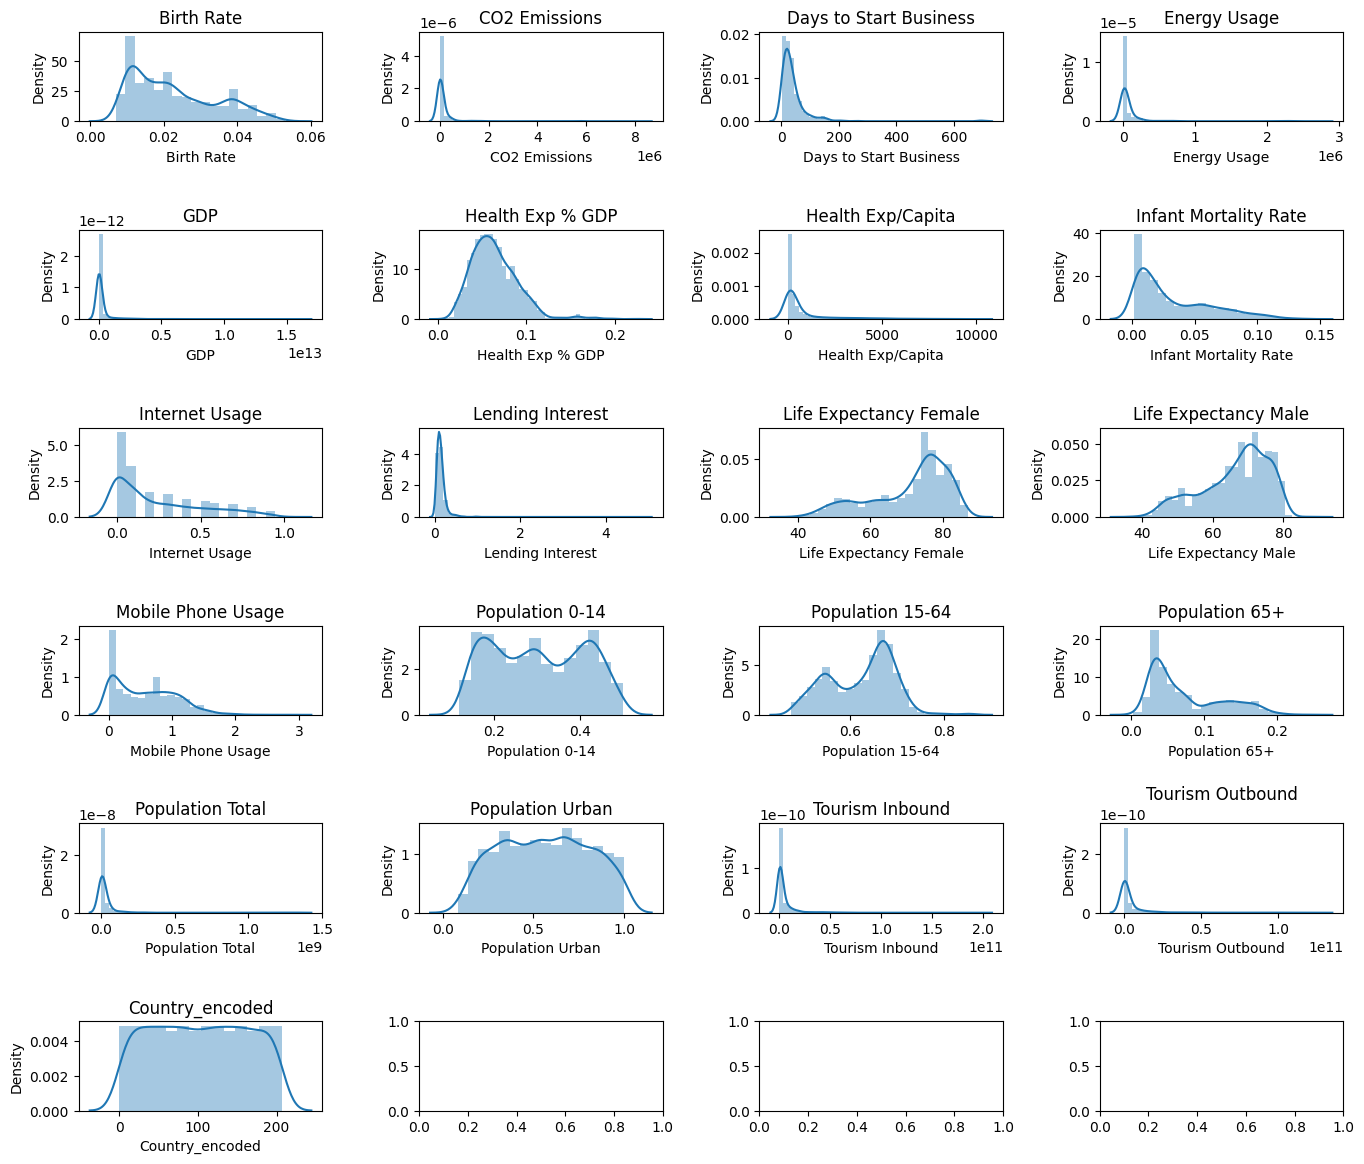

In [31]:
# Get the column names of the DataFrame
columns = df.columns

# Create a 6x4 grid of subplots for visualizing distributions
fig, axes = plt.subplots(6, 4, figsize=(14, 12), sharex=False, sharey=False)

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Loop through each column and plot its distribution
for i, col in enumerate(columns):
    if i < len(axes):  # Ensure we don't exceed the available axes
        # Plot the distribution of the column, drop missing values, and add KDE
        sns.distplot(df[col].dropna(), ax=axes[i], kde=True)
        axes[i].set_title(col)  # Set the title of the subplot to the column name
    else:
        break  # Stop if there are more columns than available subplots

# Adjust layout to prevent overlap of subplots and labels
plt.tight_layout(pad=2.0)

# Show the plot
plt.show()


In [32]:
# Lists to track updated columns with their skewness for future reference
mean_updated_columns = []
median_updated_columns = []

# Loop through columns with numeric types (float64 and int64)
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    if df[col].isna().sum() > 0:  # Check if the column contains any missing values
        skewness = df[col].skew()  # Calculate skewness of the column

        # Check if the skewness is below the threshold (indicating near-normal distribution)
        if abs(skewness) < 0.5:  # Assumed threshold for normal-like distribution
            # Replace missing values with the mean of the column
            df[col] = df[col].fillna(df[col].mean())
            mean_updated_columns.append((col, skewness))  # Track column and its skewness
        else:
            # Replace missing values with the median of the column
            df[col] = df[col].fillna(df[col].median())
            median_updated_columns.append((col, skewness))  # Track column and its skewness

# Print the list of columns updated with the mean and their skewness values
print("Columns updated with mean (skewness):")
for col, skewness in mean_updated_columns:
    print(f"{col}: {skewness:.4f}")

# Print the list of columns updated with the median and their skewness values
print("\nColumns updated with median (skewness):")
for col, skewness in median_updated_columns:
    print(f"{col}: {skewness:.4f}")


Columns updated with mean (skewness):
Population 0-14: 0.0593
Population 15-64: -0.1863

Columns updated with median (skewness):
Birth Rate: 0.6497
CO2 Emissions: 8.6540
Days to Start Business: 7.4326
Energy Usage: 7.0388
GDP: 9.4000
Health Exp % GDP: 1.1798
Health Exp/Capita: 2.8175
Infant Mortality Rate: 1.0491
Internet Usage: 0.9410
Lending Interest: 15.4986
Life Expectancy Female: -0.8831
Life Expectancy Male: -0.6956
Mobile Phone Usage: 0.5696
Population 65+: 0.9195
Tourism Inbound: 7.1149
Tourism Outbound: 5.2103


## **Observations:**
1. Columns like **GDP, CO2 Emissions, and Lending Interest** have extremely high skewness, indicating significant outliers or uneven distributions.
2. **Life Expectancy Female and Life Expectancy Male** are negatively skewed but still not close enough to normal, so median imputation was used.

In [34]:
df.isnull().sum()

Birth Rate                0
CO2 Emissions             0
Days to Start Business    0
Energy Usage              0
GDP                       0
Health Exp % GDP          0
Health Exp/Capita         0
Infant Mortality Rate     0
Internet Usage            0
Lending Interest          0
Life Expectancy Female    0
Life Expectancy Male      0
Mobile Phone Usage        0
Population 0-14           0
Population 15-64          0
Population 65+            0
Population Total          0
Population Urban          0
Tourism Inbound           0
Tourism Outbound          0
Country_encoded           0
dtype: int64

### Correlation Plot

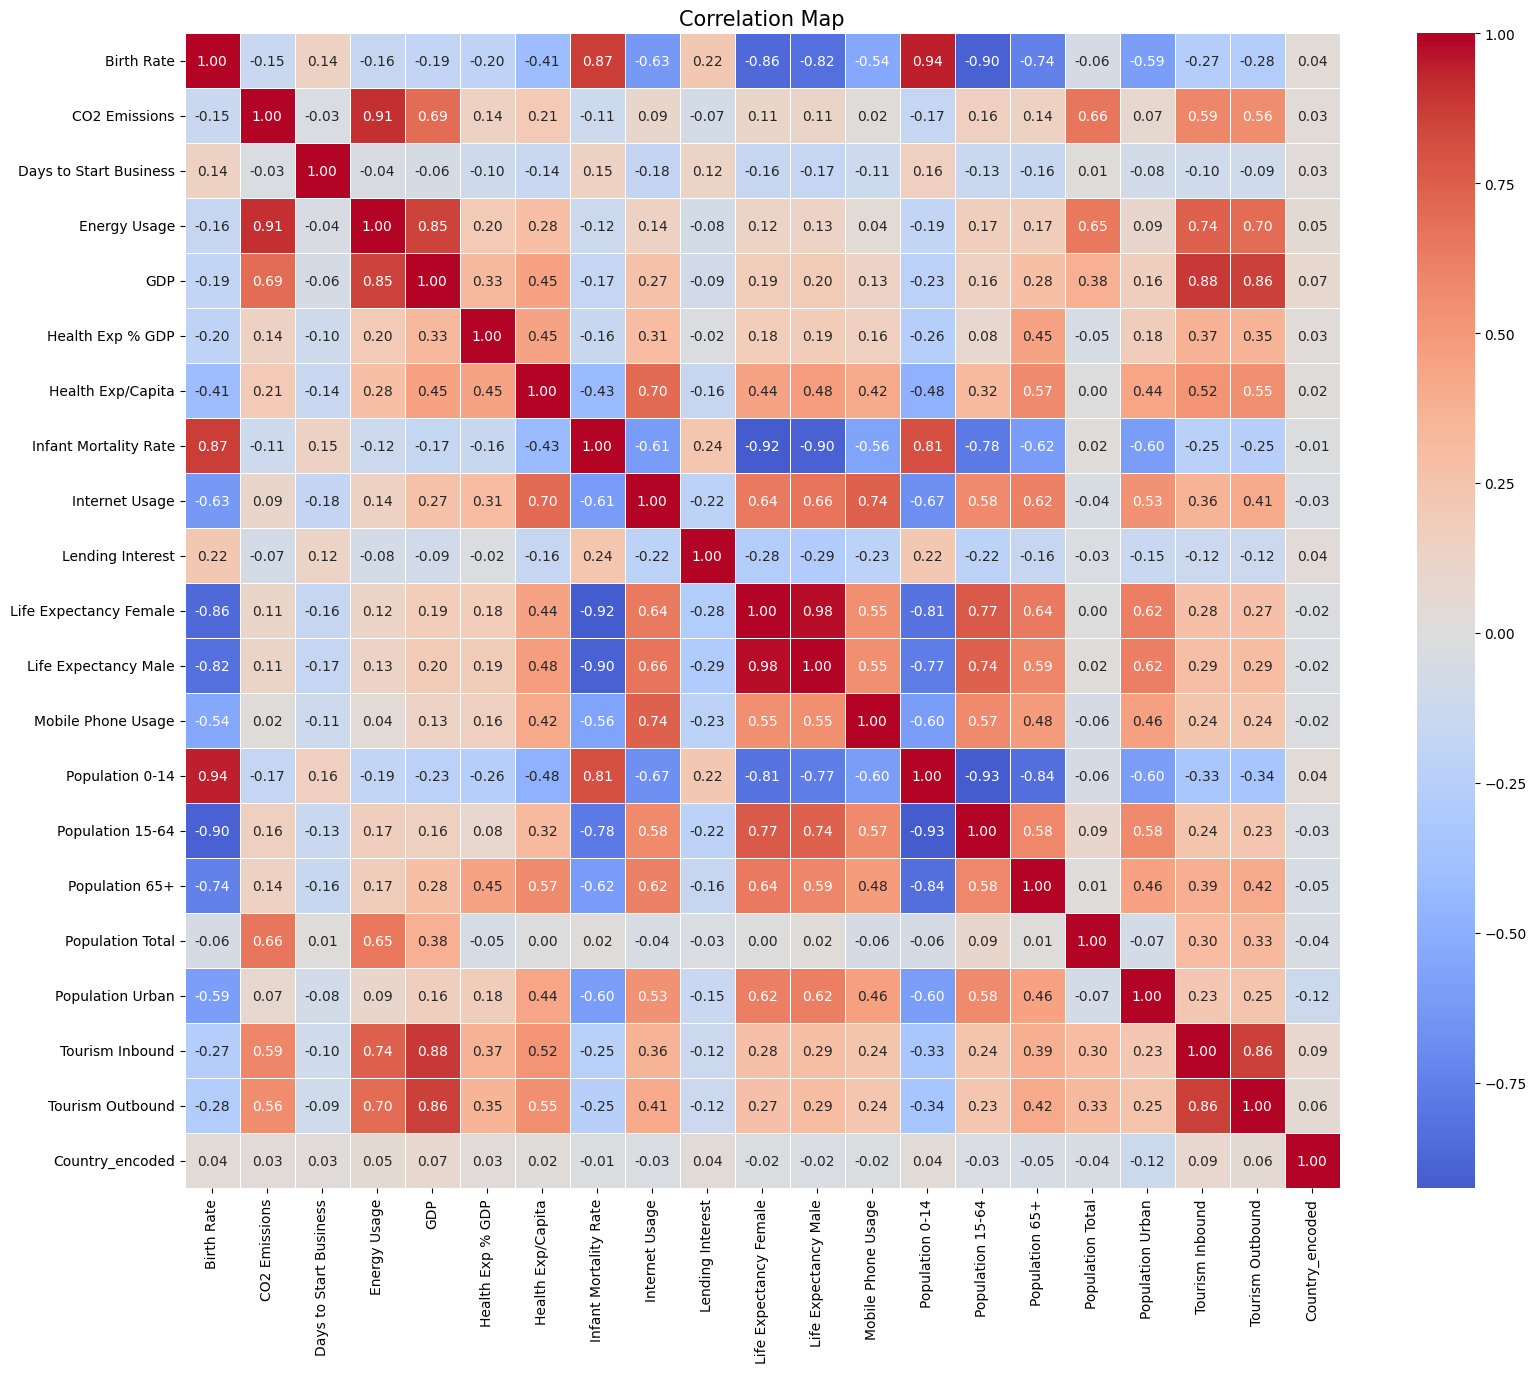

In [36]:
# visualise correlation between variables
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True,fmt='.2f', cmap='coolwarm', center=0, linewidths=0.5, square=True)
plt.xticks(rotation=90)
plt.title("Correlation Map", fontsize=15)
plt.show()
plt.close()

### Key Observations from the Correlation Matrix:

#### Strong Positive Correlations:
- **GDP and Energy Usage (0.85)**: Wealthier countries consume more energy due to industrialization.
- **Tourism Inbound and Outbound (0.86)**: Higher inbound tourism is associated with higher outbound tourism.
- **Population 0-14 and Birth Rate (0.94)**: Higher birth rates correlate with a larger proportion of the population in the 0-14 age group.
- **Life Expectancy Female and Male (0.98)**: Life expectancy for both genders is highly correlated.
- **Energy Usage and GDP (0.85)**: Higher economic activity is linked to higher energy consumption.

#### Strong Negative Correlations:
- **Birth Rate and Life Expectancy Female (-0.86)**: Higher birth rates tend to lower female life expectancy.
- **Population 0-14 and Population 15-64 (-0.90)**: Countries with more children (0-14) tend to have fewer working-age people.
- **Population 0-14 and Life Expectancy Female (-0.81)**: Higher birth rates correlate with lower female life expectancy.

#### Other Notable Correlations:
- **Health Expenditure % GDP and CO2 Emissions (0.14)**: Slight positive correlation, possibly due to industrialization.
- **Mobile Phone Usage and Internet Usage (0.74)**: Strong positive correlation, indicating higher mobile usage with more internet access.
- **Energy Usage and CO2 Emissions (0.91)**: Very strong positive correlation, as higher energy usage leads to more CO2 emissions.
- **Life Expectancy Female and Male (0.98)**: Life expectancy for both genders is almost perfectly correlated.


## Visualisation

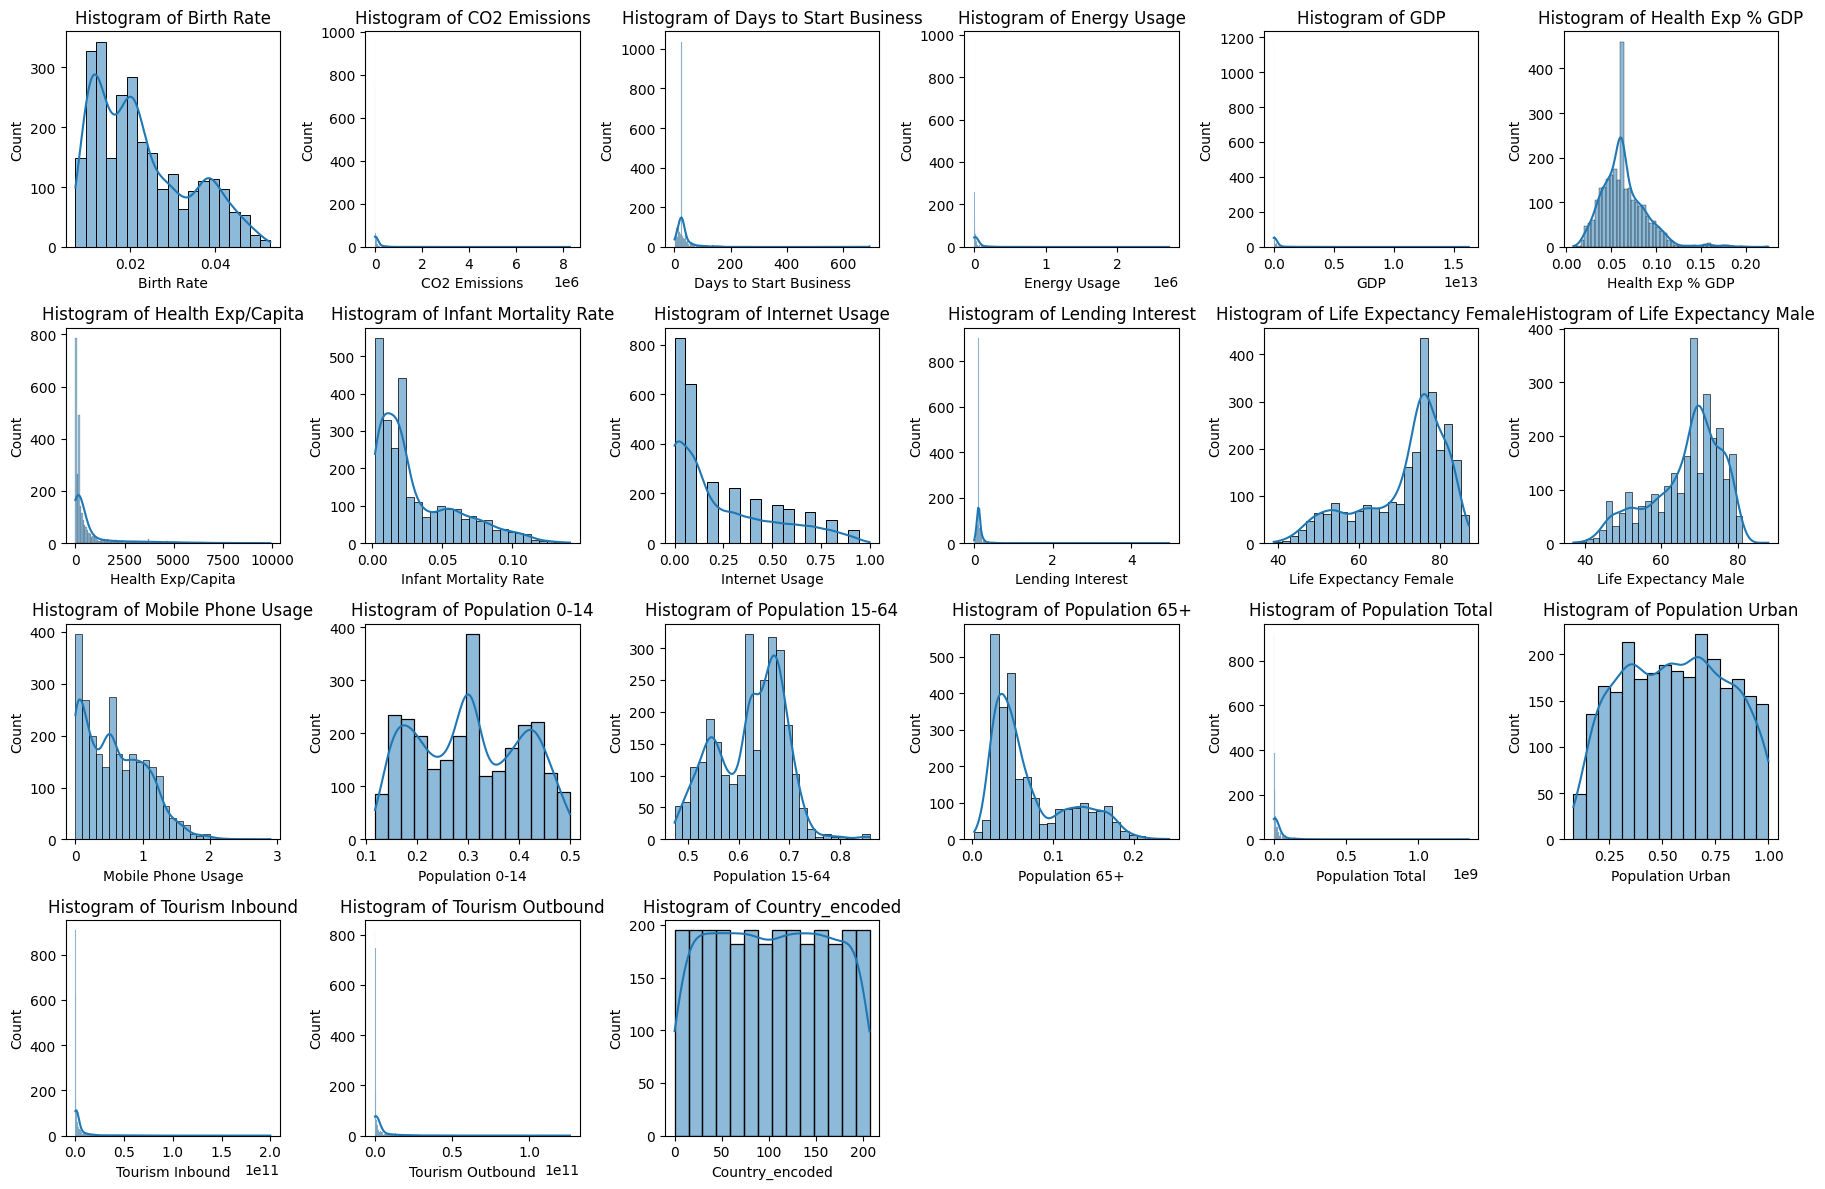

In [39]:
# Set the figure size for the plot
plt.figure(figsize=(18, 12))

# Loop through each numerical column in the DataFrame
for i, column in enumerate(df.columns, 1):
    # Create a subplot for each column
    plt.subplot(4, 6, i)  # 4 rows, 6 columns of subplots (adjust as per your data size)

    # Plot a histogram with a KDE (Kernel Density Estimate) for the current column
    sns.histplot(df[column], kde=True)

    # Set the title of the subplot to the column name
    plt.title(f'Histogram of {column}')

# Adjust the layout to prevent overlapping of subplots
plt.tight_layout()

# Display the plot
plt.show()


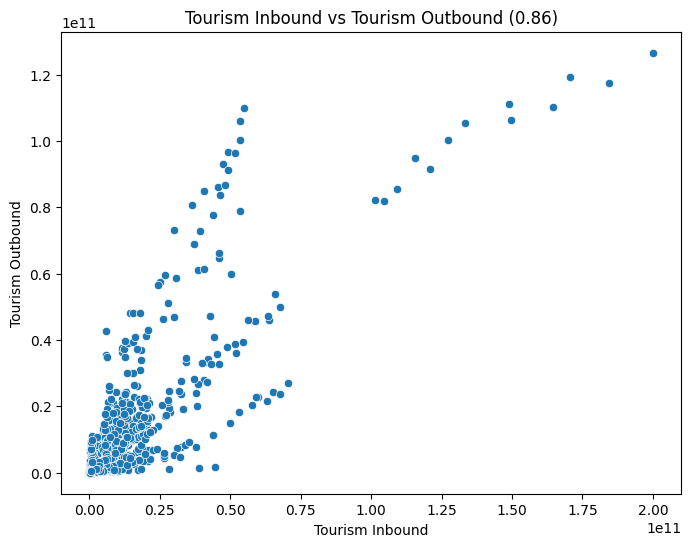

In [40]:
# Scatter Plot: Tourism Inbound vs Tourism Outbound (Strong Positive Correlation)
# Higher inbound tourism is associated with higher outbound tourism.

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Tourism Inbound'], y=df['Tourism Outbound'])
plt.title('Tourism Inbound vs Tourism Outbound (0.86)')
plt.xlabel('Tourism Inbound')
plt.ylabel('Tourism Outbound')
plt.show()

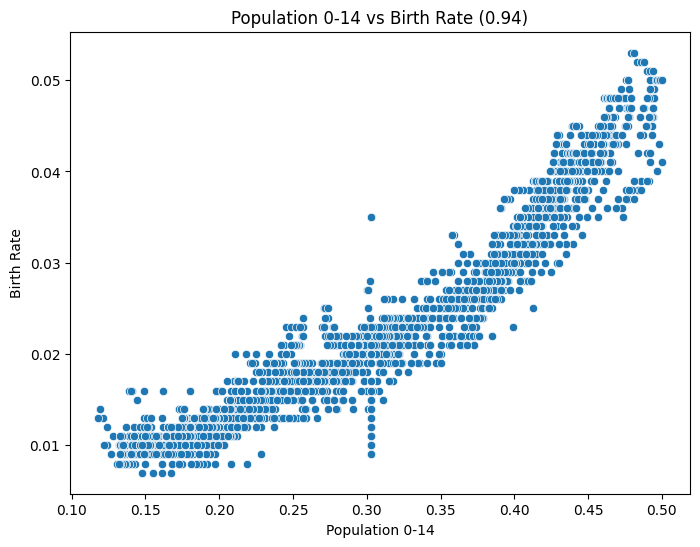

In [41]:
# Scatter Plot: Population 0-14 vs Birth Rate (Strong Positive Correlation)
# Higher birth rates correlate with a larger proportion of the population in the 0-14 age group.

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Population 0-14'], y=df['Birth Rate'])
plt.title('Population 0-14 vs Birth Rate (0.94)')
plt.xlabel('Population 0-14')
plt.ylabel('Birth Rate')
plt.show()

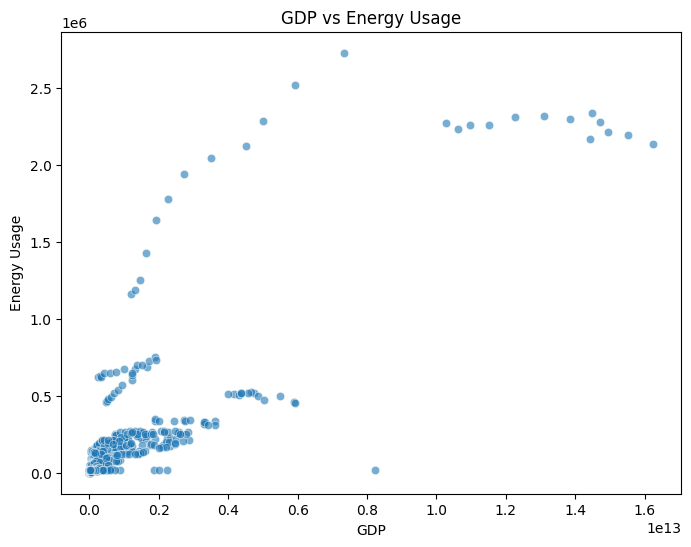

In [42]:
# Scatter Plot: GDP vs Energy Usage (Strong Positive Correlation)
# Wealthier countries consume more energy due to industrialization.

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['GDP'], y=df['Energy Usage'],alpha=0.6)
plt.title('GDP vs Energy Usage')
plt.xlabel('GDP')
plt.ylabel('Energy Usage')
plt.show()

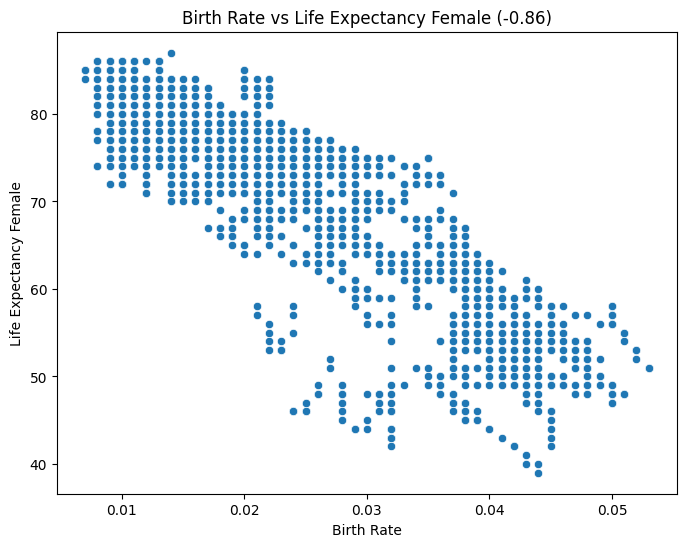

In [43]:
# Scatter Plot: Birth Rate vs Life Expectancy Female (Strong Negative Correlation)
# Life expectancy for both genders is highly correlated.

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Birth Rate'], y=df['Life Expectancy Female'])
plt.title('Birth Rate vs Life Expectancy Female (-0.86)')
plt.xlabel('Birth Rate')
plt.ylabel('Life Expectancy Female')
plt.show()

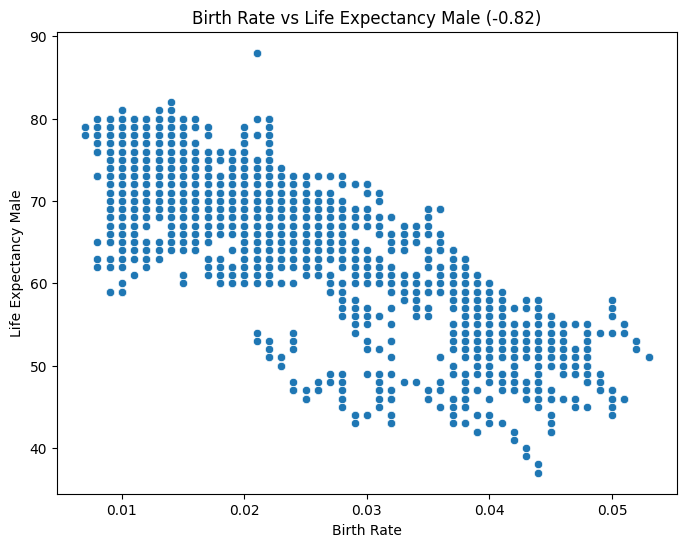

In [44]:
# Scatter Plot: Birth Rate vs Life Expectancy Female (Strong Negative Correlation)
# Life expectancy for both genders is highly correlated.

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Birth Rate'], y=df['Life Expectancy Male'])
plt.title('Birth Rate vs Life Expectancy Male (-0.82)')
plt.xlabel('Birth Rate')
plt.ylabel('Life Expectancy Male')
plt.show()

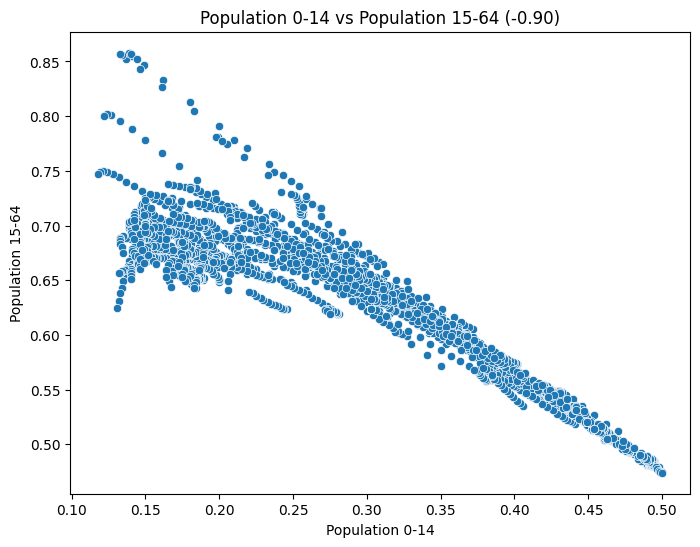

In [45]:
# Scatter Plot: Population 0-14 vs Population 15-64 (Strong Negative Correlation)
# Countries with more children (0-14) tend to have fewer working-age people.

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Population 0-14'], y=df['Population 15-64'])
plt.title('Population 0-14 vs Population 15-64 (-0.90)')
plt.xlabel('Population 0-14')
plt.ylabel('Population 15-64')
plt.show()

### Boxplot

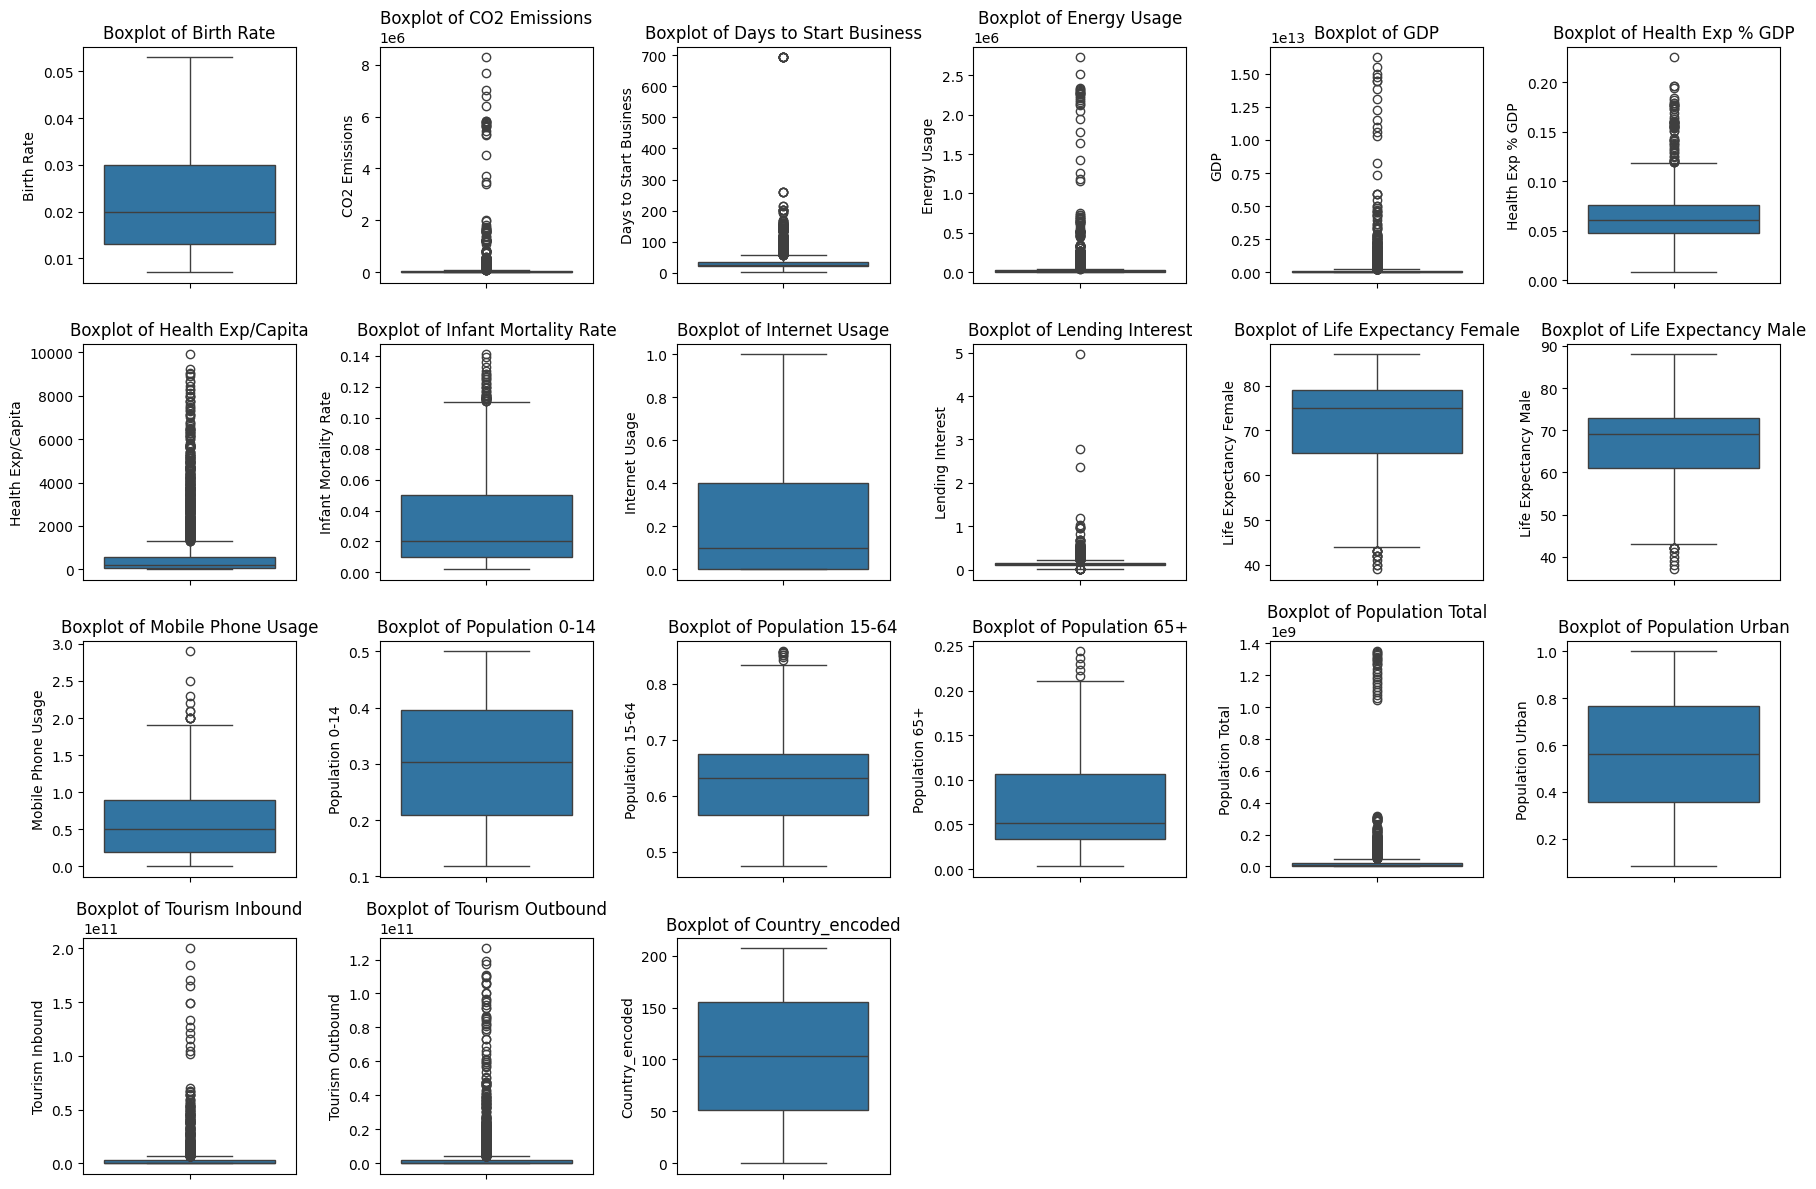

In [47]:
# Set the figure size for the plot
plt.figure(figsize=(18, 12))

# Loop through each feature (column) in the DataFrame
for i, column in enumerate(df.columns, 1):
    # Create a subplot for each column
    plt.subplot(4, 6, i)  # 4 rows, 6 columns of subplots (adjust as per your data size)

    # Plot a boxplot for the current column
    sns.boxplot(y=df[column])

    # Set the title of the subplot to the column name
    plt.title(f'Boxplot of {column}')

# Adjust the layout to prevent overlapping of subplots
plt.tight_layout()

# Display the plot
plt.show()


In [48]:
# Loop through each column in the DataFrame
for col in df.columns:
    # Calculate the first quartile (25th percentile) and third quartile (75th percentile)
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)

    # Compute the Interquartile Range (IQR)
    IQR = Q3 - Q1

    # Define lower and upper bounds for detecting outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap outliers by replacing values below the lower bound with the lower bound
    # and values above the upper bound with the upper bound
    df[col] = np.where(df[col] < lower_bound, lower_bound,
                       np.where(df[col] > upper_bound, upper_bound, df[col]))

In [49]:
df.drop(columns=['Country_encoded','Energy Usage'], inplace=True)

### Scaling

In [51]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data to scale it
scaled_data = scaler.fit_transform(df)

# Create a new DataFrame with the scaled data
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)

# Display the first few rows of the scaled DataFrame
scaled_df.head()


,Birth Rate,CO2 Emissions,Days to Start Business,GDP,Health Exp % GDP,Health Exp/Capita,Infant Mortality Rate,Internet Usage,Lending Interest,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,-0.236596,1.622677,-0.160161,-0.076107,-1.261126,-0.744196,0.085902,-0.910684,-0.520974,-0.030156,0.048323,-1.249293,0.379428,-0.065996,-0.685835,1.073846,0.146623,-0.750474,-0.671245
1,2.455774,-0.489325,-0.160161,-0.622396,-1.306086,-0.827715,2.758411,-0.910684,2.095749,-2.323851,-2.461279,-1.249293,1.685192,-1.859729,-0.977910,0.011526,-0.971940,-0.779428,-0.702316
2,1.827554,-0.702846,-0.160161,-0.703399,-0.901442,-0.843100,2.055119,-0.910684,-0.137053,-1.368145,-1.479261,-1.249293,1.470813,-1.590669,-0.894460,-0.404909,-0.731957,-0.761119,-0.765781
3,0.391624,-0.631205,-0.160161,-0.662372,-0.721600,-0.541992,0.789194,-0.910684,0.590376,-1.845998,-1.915714,-1.031274,0.778953,-0.544325,-0.894460,-0.714987,-0.125900,-0.697250,-0.660667
4,2.096791,-0.718364,-0.160161,-0.700386,-0.541758,-0.849694,2.266107,-0.910684,-0.137053,-1.845998,-1.915714,-1.249293,1.607236,-1.770043,-0.915322,-0.126796,-1.565795,-0.784112,-0.779003


In [52]:
df.columns

Index(['Birth Rate', 'CO2 Emissions', 'Days to Start Business', 'GDP',
       'Health Exp % GDP', 'Health Exp/Capita', 'Infant Mortality Rate',
       'Internet Usage', 'Lending Interest', 'Life Expectancy Female',
       'Life Expectancy Male', 'Mobile Phone Usage', 'Population 0-14',
       'Population 15-64', 'Population 65+', 'Population Total',
       'Population Urban', 'Tourism Inbound', 'Tourism Outbound'],
      dtype='object')

### PCA

In [54]:
from sklearn.decomposition import PCA

#Apply PCA
pca = PCA()
pca_data = pca.fit_transform(scaled_df)

#Explained variance ratio
print("Explained Variance Ratio for Each Component:")
print(pca.explained_variance_ratio_)


Explained Variance Ratio for Each Component:
[5.18880535e-01 1.38907087e-01 7.12362880e-02 5.17934723e-02
 4.20280111e-02 3.39759371e-02 3.13875055e-02 2.48616065e-02
 1.73832452e-02 1.58226997e-02 1.46320567e-02 1.21323345e-02
 9.13480274e-03 6.47856979e-03 4.91150204e-03 2.88483516e-03
 2.69286961e-03 7.93257710e-04 6.33846773e-05]


In [55]:
 #Cumulative explained variance
print("Cumulative Explained Variance:")
print(np.cumsum(pca.explained_variance_ratio_))


Cumulative Explained Variance:
[0.51888054 0.65778762 0.72902391 0.78081738 0.82284539 0.85682133
 0.88820884 0.91307044 0.93045369 0.94627639 0.96090844 0.97304078
 0.98217558 0.98865415 0.99356565 0.99645049 0.99914336 0.99993662
 1.        ]


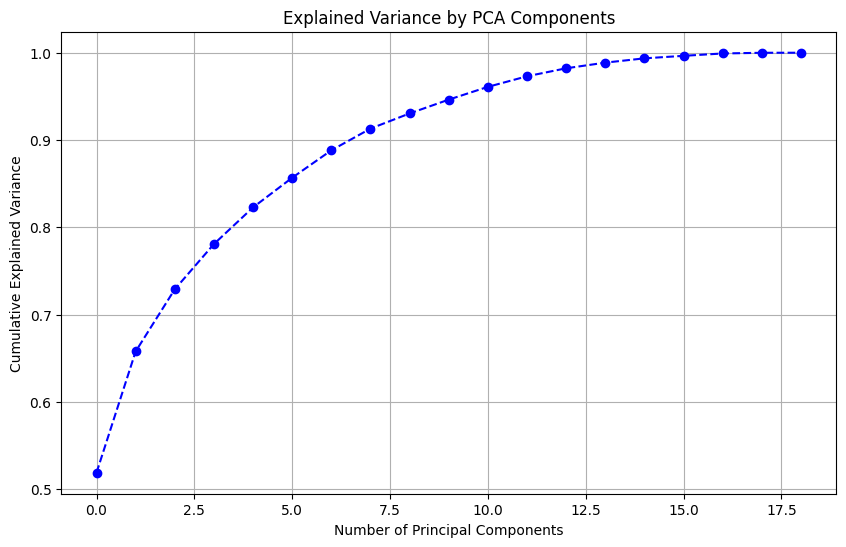

In [56]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--', color='b')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid()
plt.show()

In [57]:
#Apply PCA with 15 components

pca = PCA(n_components=15)
pca_data = pca.fit_transform(scaled_df)
pca_data = pd.DataFrame(pca_data, columns=[f'PC{i+1}' for i in range(15)])

# Display the explained variance ratio of each component
print("Explained Variance Ratio for Each Component:")
print(pca.explained_variance_ratio_)

# Display the cumulative variance explained
print("Cumulative Explained Variance:")
print(np.cumsum(pca.explained_variance_ratio_))

Explained Variance Ratio for Each Component:
[0.51888054 0.13890709 0.07123629 0.05179347 0.04202801 0.03397594
 0.03138751 0.02486161 0.01738325 0.0158227  0.01463206 0.01213233
 0.0091348  0.00647857 0.0049115 ]
Cumulative Explained Variance:
[0.51888054 0.65778762 0.72902391 0.78081738 0.82284539 0.85682133
 0.88820884 0.91307044 0.93045369 0.94627639 0.96090844 0.97304078
 0.98217558 0.98865415 0.99356565]


- By Looking at graph we can decide how much percentage we want and accordingly go for that much column numbers. here, we are taking 15 columns because they are giving more than 97% data.


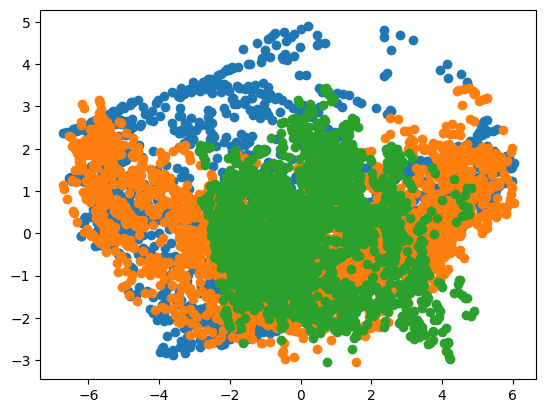

In [59]:
# Plot
x=pca_data['PC1']
y=pca_data['PC2']
z=pca_data['PC3']
plt.scatter(x,y)
plt.scatter(x,z)
plt.scatter(y,z)
plt.show()

# Clustering algorithm

In [61]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

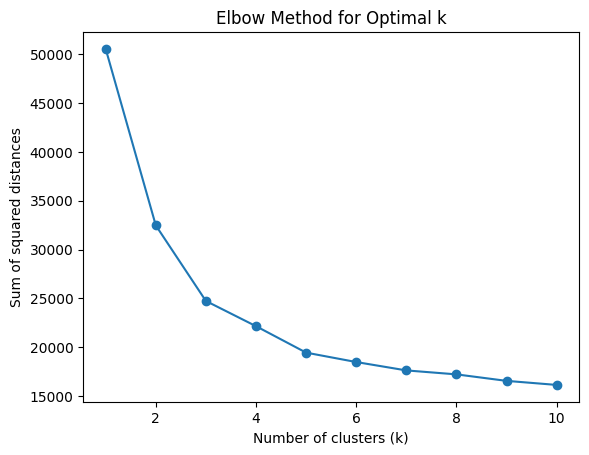

In [62]:
# Determine optimal K using Elbow Method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_data)
    sse.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method for Optimal k')
plt.show()

In [147]:
# Fit K-Means with the chosen k
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_data)

# Add cluster labels to the original data
df['KMeans_Cluster'] = kmeans_labels

# Heirarchial clustering

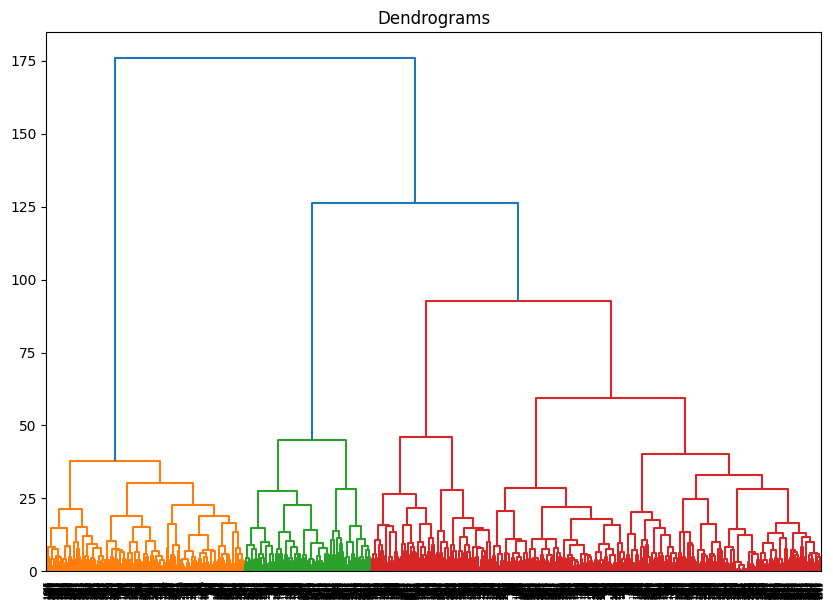

In [149]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

# Plot dendrogram to decide the number of clusters
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dendrogram = shc.dendrogram(shc.linkage(scaled_data, method='ward'))

# Fit Agglomerative Clustering with an optimal number of clusters (from dendrogram)
hierarchical = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='average')
hierarchical_labels = hierarchical.fit_predict(pca_data)

# Add cluster labels to the original data
df['Hierarchical_Cluster'] = hierarchical_labels


# DBSCAN(Density-Based Spatial Clustering of Applications with Noise)

In [190]:
from sklearn.cluster import DBSCAN

# Fit DBSCAN with suitable parameters for epsilon and min_samples
dbscan = DBSCAN(eps=1.0, min_samples=5)  # Adjust eps and min_samples for your data
dbscan_labels = dbscan.fit_predict(scaled_data)

# Add DBSCAN labels to the original data
df['DBSCAN_Cluster'] = dbscan_labels

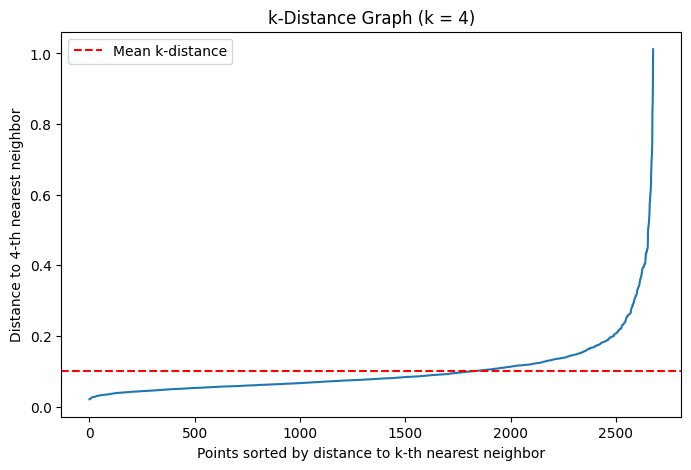

In [152]:
# Step 1: Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

# Step 2: Generate or load a dataset
# For demonstration, we use a synthetic dataset
from sklearn.datasets import make_blobs
pca_data, labels = make_blobs(n_samples=scaled_data.shape[0], centers=4, cluster_std=0.6, random_state=42)

# Step 3: Define parameters
minPts = 5  # Minimum points to form a dense region
k = minPts - 1  # k is minPts - 1 for DBSCAN

# Step 4: Compute distances to the k-th nearest neighbor
nearest_neighbors = NearestNeighbors(n_neighbors=k)
nearest_neighbors.fit(pca_data)
distances, indices = nearest_neighbors.kneighbors(pca_data)

# Step 5: Sort distances for the k-th nearest neighbor
k_distances = np.sort(distances[:, k - 1])  # k-th nearest neighbor distance

# Step 6: Plot the k-Distance graph
plt.figure(figsize=(8, 5))
plt.plot(k_distances)
plt.axhline(y=np.mean(k_distances), color='r', linestyle='--', label='Mean k-distance')
plt.title(f'k-Distance Graph (k = {k})')
plt.xlabel('Points sorted by distance to k-th nearest neighbor')
plt.ylabel(f'Distance to {k}-th nearest neighbor')
plt.legend()
plt.show()


# Analysis interpretation

In [154]:
# Analyze clusters for each algorithm
kmeans_summary = df.groupby('KMeans_Cluster').mean()
hierarchical_summary = df.groupby('Hierarchical_Cluster').mean()
dbscan_summary = df.groupby('DBSCAN_Cluster').mean()  # Note: DBSCAN may include a -1 label for noise

# Display summaries
print("K-Means Cluster Summary:")
print(kmeans_summary)
print("\nHierarchical Cluster Summary:")
print(hierarchical_summary)
print("\nDBSCAN Cluster Summary (Note: -1 may represent noise):")
print(dbscan_summary)

K-Means Cluster Summary:
                Birth Rate  CO2 Emissions  Days to Start Business  \
KMeans_Cluster                                                      
0                 0.022585   27978.773881               28.342537   
1                 0.022866   27294.726008               28.156460   
2                 0.022227   28247.103326               28.724215   

                         GDP  Health Exp % GDP  Health Exp/Capita  \
KMeans_Cluster                                                      
0               6.114112e+10          0.063782         392.614925   
1               6.011252e+10          0.062913         390.107730   
2               6.324050e+10          0.062590         421.584828   

                Infant Mortality Rate  Internet Usage  Lending Interest  \
KMeans_Cluster                                                            
0                            0.031612        0.231194          0.125833   
1                            0.032235        0.223674     

# Key Observations for Clustering Models

## 1. **K-Means Cluster Summary**
- **Cluster 0**:
  - Moderate GDP and health expenditure per capita.
  - Balanced internet usage and mobile phone usage.
  - Moderate inbound and outbound tourism.
- **Cluster 1**:
  - Slightly lower GDP compared to Cluster 0 but similar health expenditure.
  - Slightly lower internet and mobile phone usage.
  - Slightly less inbound tourism compared to Cluster 0.
- **Cluster 2**:
  - Highest GDP and health expenditure among clusters.
  - Highest internet and mobile phone usage.
  - Highest inbound and outbound tourism activity.

---

## 2. **Hierarchical Cluster Summary**
- **Cluster 0**:
  - Lowest GDP and health expenditure per capita among clusters.
  - Slightly lower internet usage and life expectancy compared to other clusters.
  - Slightly higher birth and infant mortality rates.
- **Cluster 1**:
  - Highest GDP and health expenditure per capita.
  - Highest internet and mobile phone usage.
  - Highest inbound and outbound tourism.
- **Cluster 2**:
  - Moderate GDP and health expenditure per capita.
  - Balanced internet and mobile phone usage.
  - Moderate inbound and outbound tourism.

---

## 3. **DBSCAN Cluster Summary**
- **Cluster 0**:
  - High GDP and health expenditure per capita.
  - Balanced internet and mobile phone usage.
  - High inbound and outbound tourism.
- **Cluster 1**:
  - Moderate GDP and health expenditure per capita.
  - Balanced internet and mobile phone usage.
  - Moderate inbound and outbound tourism.
- **Cluster 2**:
  - Lowest GDP and health expenditure per capita.
  - Lowest internet and mobile phone usage.
  - Lowest inbound and outbound tourism.
- **Cluster 3**:
  - Highest GDP and health expenditure per capita.
  - Highest internet and mobile phone usage.
  - Highest inbound and outbound tourism.

---

## **Comparison Across Models**
- **K-Means**: Captures well-defined groupings with moderate variation between clusters. GDP and tourism metrics are the key differentiators.
- **Hierarchical**: Similar observations to K-Means but provides slightly more separation between clusters in terms of health expenditure and life expectancy.
- **DBSCAN**: Handles noise (Cluster -1 if applicable) and identifies finer distinctions in tourism and health metrics. Useful for detecting outlier-like clusters or smaller variations.


# Visualization

## K means

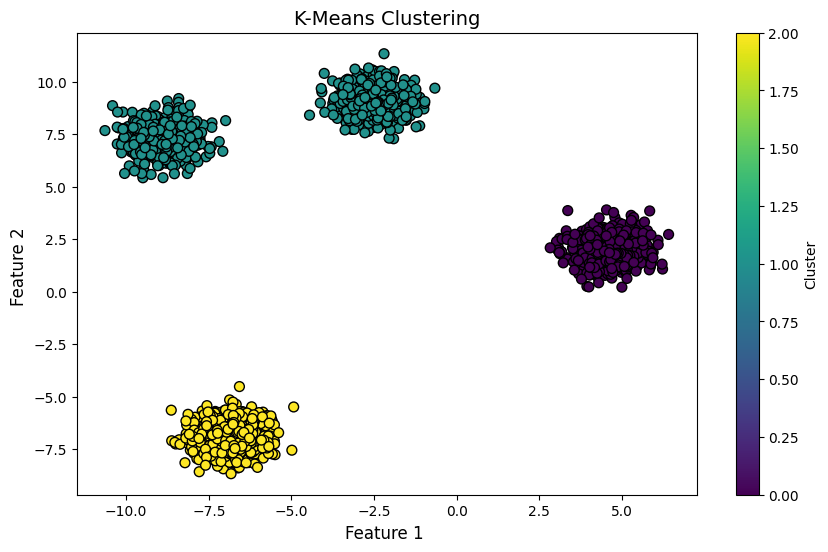

In [160]:
# Plot K-Means Clusters
plt.figure(figsize=(10, 6))

# Scatter plot for the clusters
plt.scatter(
    x=pca_data[:, 0],  # First principal component
    y=pca_data[:, 1],  # y-axis
    c=kmeans.labels_,    # Color by cluster labels
    cmap='viridis',     # Colormap
    marker='o',         # Marker shape
    edgecolor='k',      # Black edge around markers
    s=50                # Marker size
)

# Add title and color bar for clarity
plt.title('K-Means Clustering', fontsize=14)
plt.colorbar(label='Cluster')  # Add a label to the color bar

# Label the axes
plt.xlabel('Feature 1 ', fontsize=12)
plt.ylabel('Feature 2 ', fontsize=12)

# Display the plot
plt.show()


## Hierarchical clusters

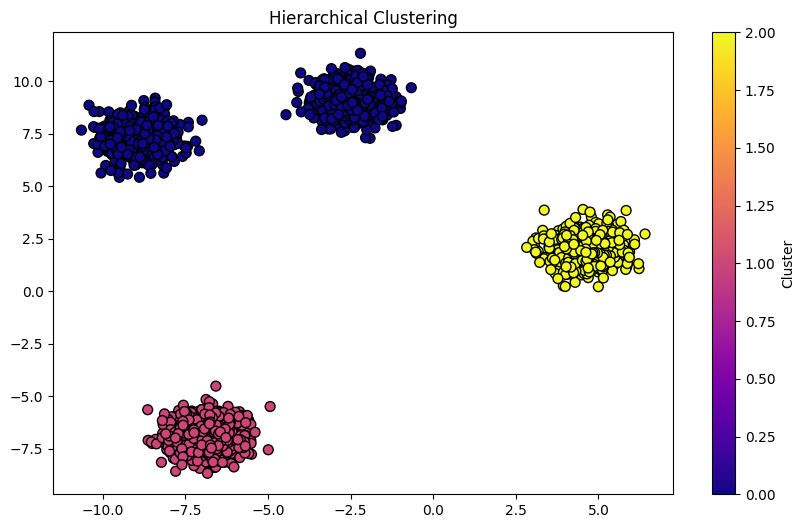

In [162]:
# Plot Hierarchical clusters
plt.figure(figsize=(10, 6))
plt.scatter( x=pca_data[:, 0],  # First principal component
    y=pca_data[:, 1], c=hierarchical_labels, cmap='plasma', marker='o', edgecolor='k', s=50)
plt.title('Hierarchical Clustering')

plt.colorbar(label='Cluster')
plt.show()

## DBSCAN(Density-Based Spatial Clustering of Applications with Noise)

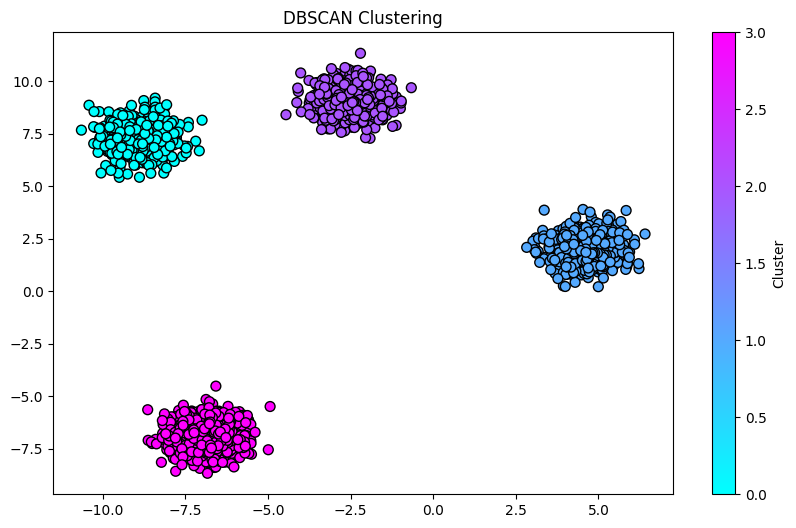

In [164]:
# Plot DBSCAN clusters
plt.figure(figsize=(10, 6))
plt.scatter( x=pca_data[:, 0],  # First principal component
    y=pca_data[:, 1], c=dbscan_labels, cmap='cool', marker='o', edgecolor='k', s=50)
plt.title('DBSCAN Clustering')
plt.colorbar(label='Cluster')
plt.show()

# Evaluation and Performance Metrics:

In [166]:
from sklearn.metrics import silhouette_score

In [167]:
# Calculate silhouette score for K-Means
kmeans_silhouette = silhouette_score(pca_data, kmeans.labels_)
print(f"Silhouette Score for K-Means: {kmeans_silhouette:.3f}")
#similarly calculating fo dbscan and heirarchial

Silhouette Score for K-Means: 0.795


In [168]:
# Calculate silhouette score for DBSCAN, ignoring noise points
# Filter out noise points (-1) from DBSCAN labels
dbscan_labels_filtered = dbscan_labels[dbscan_labels != -1]
scaled_data_filtered = pca_data[dbscan_labels != -1]

# Only calculate silhouette score if there are clusters besides noise
if len(set(dbscan_labels_filtered)) > 1:
    dbscan_silhouette = silhouette_score(scaled_data_filtered, dbscan_labels_filtered)
    print(f"Silhouette Score for DBSCAN (excluding noise): {dbscan_silhouette:.3f}")
else:
    print("DBSCAN did not find sufficient clusters for silhouette score calculation.")


Silhouette Score for DBSCAN (excluding noise): 0.875


In [192]:
# silhoutte score for all three(in dbscan without exclusing noise)

from sklearn.metrics import silhouette_score
# Calculate silhouette scores for K-Means, Hierarchical, and DBSCAN
kmeans_score = silhouette_score(pca_data, kmeans.labels_)
hierarchical_score = silhouette_score(pca_data, hierarchical_labels)
dbscan_score = silhouette_score(scaled_data, dbscan_labels)

print("K-Means Silhouette Score:", kmeans_score)
print("\nHierarchical Silhouette Score:", hierarchical_score)
print("\nDBSCAN Silhouette Score:", dbscan_score)

K-Means Silhouette Score: 0.7953286147299097

Hierarchical Silhouette Score: 0.7953286147299097

DBSCAN Silhouette Score: -0.005625769755023718


# Cluster Analysis Observation

### **Silhouette Scores**
| **Algorithm**       | **Silhouette Score**       |
|----------------------|----------------------------|
| **K-Means**          | 0.7953                    |
| **Hierarchical**     | 0.7953                    |
| **DBSCAN**           | -0.0056                   |

### **Observations**
1. **K-Means**:
   - Achieved a high **Silhouette Score (0.7953)**, indicating well-defined and compact clusters.
   - Clusters align meaningfully with the dataset features: **Developed Economies, High-Income Economies, and Low-Income Economies**.
   - Best suited for this dataset due to its interpretability and clear separation.

2. **Hierarchical Clustering**:
   - Same **Silhouette Score (0.7953)** as K-Means.
   - Provides a hierarchical view of clusters, which adds flexibility in analyzing relationships between clusters at different levels.
   - Comparable to K-Means but more computationally expensive for larger datasets.

3. **DBSCAN**:
   - Poor performance with a **negative Silhouette Score (-0.0056)**, indicating that clusters are not well-formed or cohesive.
   - Likely struggled due to the dataset's characteristics (e.g., lack of distinct dense regions).
   - While it handles noise effectively, it does not form meaningful clusters in this case.

### **Conclusion**
- **K-Means** is the best algorithm for this dataset, offering high cluster quality and clear interpretability.
- **Hierarchical Clustering** is a good alternative for exploring cluster relationships but does not provide additional benefits over K-Means in this case.
- **DBSCAN** is not suitable for this dataset due to its poor cluster formation and negative Silhouette Score.


In [171]:
import joblib
joblib.dump(kmeans, 'kmeans_model.joblib')

['kmeans_model.joblib']

In [172]:
import joblib
joblib.dump(scaler, 'scaler_model.joblib')

['scaler_model.joblib']